Key Objective 1
1. Read data in multiple csv file
2. Explore the data 
3. Create new columns to aid in analysis
4. Filter, sort and aggregate the data to pinpoint and sumarize important information 
5. Build plots communicate key insights 

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [89]:
import pandas as pd 
import numpy as np

In [90]:
transactions = pd.read_csv('project_transactions.csv',dtype={"DAY":"int16",
                                                            "QUANTITY":"int32",
                                                            "STORE_ID":"int32",
                                                            "WEEK_NO":"int8"})

In [91]:
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0


In [92]:
transactions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int32  
 5   SALES_VALUE        float64
 6   STORE_ID           int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int16(1), int32(2), int64(3), int8(1)
memory usage: 137.1 MB


In [93]:
# Use to identify which value can be downcast
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,3268.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


In [94]:
# Check missing value counts 
transactions.isna().sum()
transactions.isnull().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [95]:
# Calculate unique households in dataset with nunique (describe could also be used)
transactions['household_key'].nunique()

2099

In [96]:
# Calculate unique product_ids in dataset with nunique
transactions['PRODUCT_ID'].nunique()

84138

Column Creation
Create two columns:
- A column that captures the total_discount by row (sum of RETAIL_DISC, COUPON_DISC)
- The percentage disount (total_discount / SALES_VALUE). Make sure this is positive (try .abs()).
- If the percentage discount is greater than 1, set it equal to 1. If it is less than one, set it to 0.
- Drop the individual discount columns (RETAIL_DISC, COUPON_DISC, COUPON_MATCH_DISC).
- Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [97]:
# create a discount sum column and a percentage discount column
transactions = (
    transactions.assign(total_discount = transactions['RETAIL_DISC'] + transactions['COUPON_DISC'],
                        percentage_discount = (lambda x: (x["total_discount"] / x['SALES_VALUE']).abs()))
)
transactions = transactions.drop(['RETAIL_DISC','COUPON_DISC','COUPON_DISC'], axis=1)

In [98]:
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,COUPON_MATCH_DISC,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,0.0,-0.79,1.316667
...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.0,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.0,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.0,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,0.0,-0.49,0.108889


In [99]:
# Use where to cap values above 1 at 1 and below 0 at 0. Other methods could be used here as well.
transactions['percentage_discount'] = (transactions['percentage_discount']
                                       .where(transactions['percentage_discount'] < 1, 1.0)
                                       .where(transactions['percentage_discount'] > 0, 0))
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,COUPON_MATCH_DISC,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,0.0,-0.79,1.000000


Overall Statistics
    - Calculate:
- The total sales (sum of SALES_VALUE),
- Total discount (sum of total_discount)
- Overall percentage discount (sum of total_discount / sum of sales value)
- Total quantity sold (sum of QUANTITY).
- Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
- Total sales value per basket (sum of sales value / nunique basket_id).
- Total sales value per household (sum of sales value / nunique household_key).
- What was the highest quantiy sold for a single item in a single row?

Household Analysis
- Plot the distribution of total sales value purchased at the household level.
- What were the top 10 households by quantity purchased?
- What were the top 10 households by sales value?
- Plot the total sales value for our top 10 households by value, ordered from highest to lowest.

<AxesSubplot:ylabel='Frequency'>

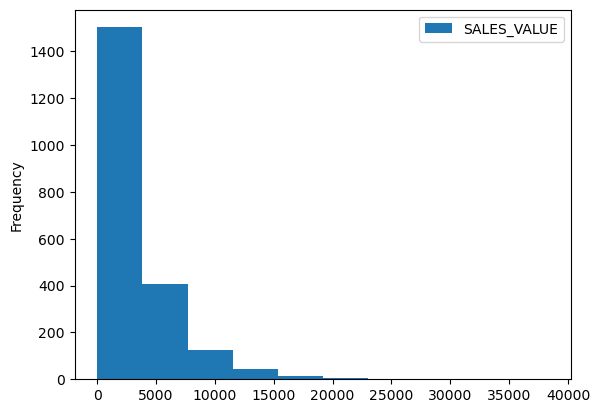

In [100]:
# plot distribution of households by total sales value
# First groupby household and calculate sum of sales
# then plot with a histogram
transactions.groupby('household_key').agg({'SALES_VALUE': 'sum'}).plot.hist()

In [101]:
# store top 10 households by total value and quantity
# groupby household_key, calculate sum of relevant columns by household
# sort both by relevant metric in descending order, and grab top 10 rows
top10_value = (transactions.groupby('household_key').agg({'SALES_VALUE': 'sum'}).sort_values('SALES_VALUE', ascending=False).iloc[:10])
top10_value
top10_quantity = (transactions.groupby('household_key').agg({'QUANTITY': 'sum'}).sort_values('QUANTITY', ascending=False).iloc[:10])
top10_quantity, top10_value

(               QUANTITY
 household_key          
 1023            4479917
 755             3141769
 1609            2146715
 13              1863829
 1430            1741892
 1527            1734632
 1762            1669880
 707             1640193
 1029            1496204
 1314            1492863,
                SALES_VALUE
 household_key             
 1023              38319.79
 1609              27859.68
 1453              21661.29
 1430              20352.99
 718               19299.86
 707               19194.42
 1653              19153.75
 1111              18894.72
 982               18790.34
 400               18494.14)

In [102]:
# Use multiple aggregation to create both in a single table an option
# this here is just to use to compare to chart
transactions.groupby('household_key').agg({'SALES_VALUE': 'sum','QUANTITY': 'sum' }).sort_values('SALES_VALUE', ascending=False).loc[:,'SALES_VALUE'].describe()

count     2099.000000
mean      3175.914007
std       3287.043772
min          8.170000
25%        971.035000
50%       2145.710000
75%       4295.395000
max      38319.790000
Name: SALES_VALUE, dtype: float64

<AxesSubplot:xlabel='household_key'>

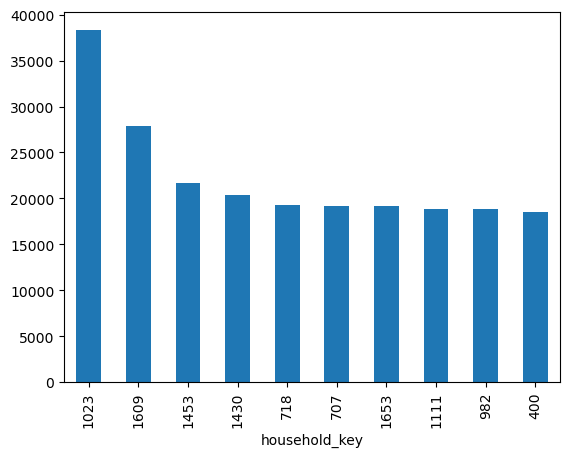

In [103]:
# top 10 households by sales value plotted with a bar plot
top10_value['SALES_VALUE'].plot.bar()

Product Analysis
- Which products had the most sales by sales_value? Plot a horizontal bar chart.
    - Did the top selling items have a higher than average discount rate?
    - Look up the names of the top 10 products by sales in the products.csv dataset.
    - What was the name most common PRODUCT_ID among rows with the households in our top 10 households by sales value?
    - Look up the product name of the item that had the highest quantity sold in a single row.

In [104]:
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,COUPON_MATCH_DISC,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,0.0,-0.79,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.0,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.0,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.0,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,0.0,-0.49,0.108889


In [105]:
# Create top 10 products by sales df
# group by PRODUCT_ID and sum sales value by product
# Sort in descending order and grab top 10 rows
top10_products = (transactions.groupby('PRODUCT_ID').agg({'SALES_VALUE': 'sum'}).sort_values('SALES_VALUE', ascending=False).iloc[:10])
top10_products

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


<AxesSubplot:ylabel='PRODUCT_ID'>

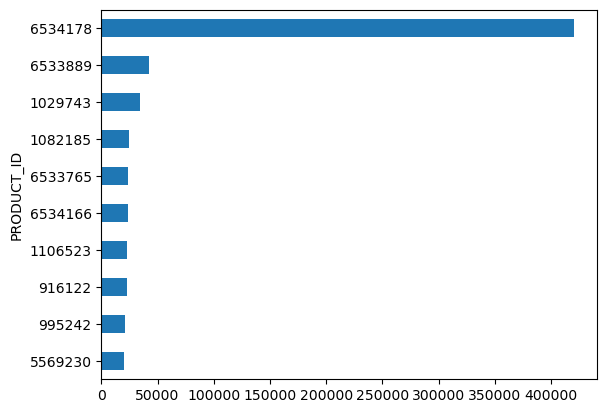

In [106]:
top10_products['SALES_VALUE'].sort_values().plot.barh()

In [107]:
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products
((transactions.query('PRODUCT_ID in @top10_products.index').loc[:,'total_discount'].sum()) / 
 transactions.query('PRODUCT_ID in @top10_products.index').loc[:, 'SALES_VALUE'].sum())

-0.10331267387397927

In [108]:
# read in products data
products = pd.read_csv('product.csv')

In [109]:
products

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [110]:
top10_value

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [111]:
# Look up top 10 products for households in top10_value table
# Use query to reference index of top10_value to filter to relevant households
# Use value counts to get counts by product_id (this will be order in descending order)
# Then grab the top 10 products with iloc and extract the index to get product numbers
top_hh_products = (transactions.query('household_key in @top10_value.index').loc[:,'PRODUCT_ID'].value_counts().iloc[:10].index) 
print(top_hh_products)

Int64Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776,
            1106523,  981760, 9677202],
           dtype='int64')


In [112]:
# Filter product table to products from prior cell
products.query('PRODUCT_ID in @top_hh_products')

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [113]:
# Product with highest quantity in a single row
products.query('PRODUCT_ID == 9677202'	)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [114]:
# Look up 10 product names for all customers (from first cell)
products.query('PRODUCT_ID in @top10_products.index')

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


Objective 2 
- Join multiple DataFrame
- Filter, sort and aggregate the data to pinpoint and sumarize important information 
- Work with datetime fields to analyze time series  
- Build plot to communicate key insights
- Optimize the import workflow
- Write out summary tables for stakeholders   

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.
- First, read in the transactions data.
- Read in the only columns household_key, BASKET_ID, DAY, PRODUCT_ID, QUANTITY, and SALES_VALUE.
- Convert DAY, QUANTITY, and PRODUCT_ID to the smallest appropriate integer types.

In [115]:
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,COUPON_MATCH_DISC,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,0.0,-0.79,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.0,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.0,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.0,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,0.0,-0.49,0.108889


In [116]:
# Use the following snippet to create a Date Column then drop. Then drop the `DAY` column.
transactions = transactions.assign(date = pd.to_datetime('2023',format='%Y') + pd.to_timedelta(transactions['DAY'].sub(1).astype(str) + 'days'))

In [117]:
transactions = transactions.drop('DAY',axis=1)

In [118]:
transactions

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,COUPON_MATCH_DISC,total_discount,percentage_discount,date
0,1364,26984896261,842930,1,2.19,31742,1,0.0,0.00,0.000000,2023-01-01
1,1364,26984896261,897044,1,2.99,31742,1,0.0,-0.40,0.133779,2023-01-01
2,1364,26984896261,920955,1,3.09,31742,1,0.0,0.00,0.000000,2023-01-01
3,1364,26984896261,937406,1,2.50,31742,1,0.0,-0.99,0.396000,2023-01-01
4,1364,26984896261,981760,1,0.60,31742,1,0.0,-0.79,1.000000,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,92130,1,0.99,3228,102,0.0,0.00,0.000000,2024-12-11
2146307,1598,42305362535,114102,1,8.89,3228,102,0.0,0.00,0.000000,2024-12-11
2146308,1598,42305362535,133449,1,6.99,3228,102,0.0,0.00,0.000000,2024-12-11
2146309,1598,42305362535,6923644,1,4.50,3228,102,0.0,-0.49,0.108889,2024-12-11


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2023 and October 2024.
* Then, plot the sum of sales 2023 vs the 2024 sales.
* Then, plot total sales by day of week.

<AxesSubplot:xlabel='date'>

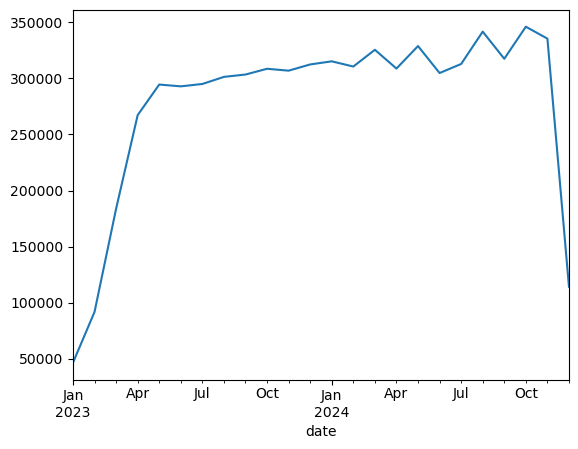

In [119]:
# Set a date index, graby the sales column, and calculate a monthly sum using resampling.
# Then build the default line plot
transactions.set_index('date').loc[:,'SALES_VALUE'].resample('M').sum().plot()

<AxesSubplot:xlabel='date'>

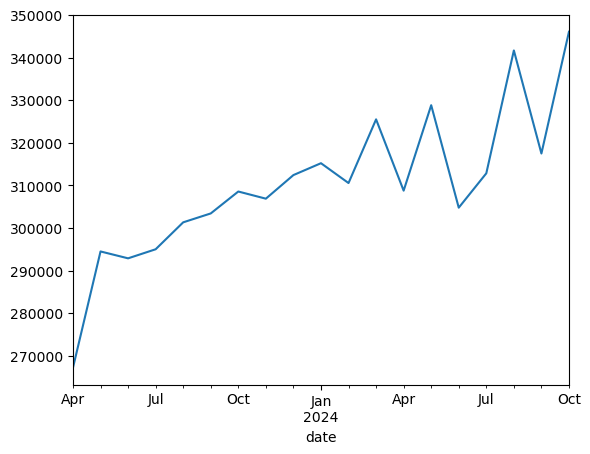

In [120]:
# Filter above plot to specified date range with row slice in .loc
(transactions.set_index('date').loc['2023-04':'2024-10', 'SALES_VALUE'].resample('M').sum().plot())

<AxesSubplot:xlabel='date'>

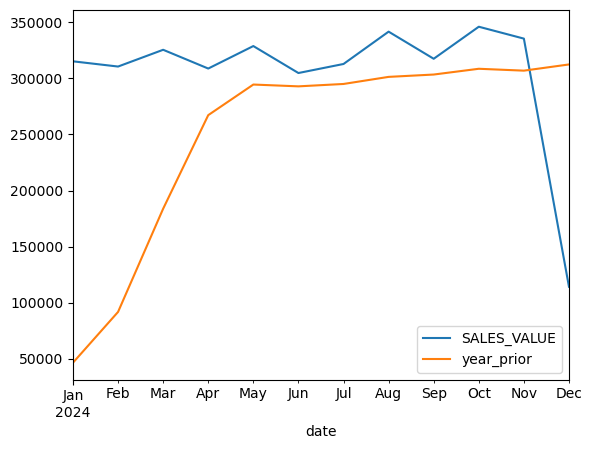

In [121]:
# After resampling monthly sales, create a year_prior column with assign
# This column is our monthly sales shifted forward a year (12 rows/months)
(transactions.set_index('date').loc[:,['SALES_VALUE']].resample('M').sum().assign(year_prior = lambda x: x['SALES_VALUE'].shift(12)).loc['2024'].plot())

<AxesSubplot:xlabel='date'>

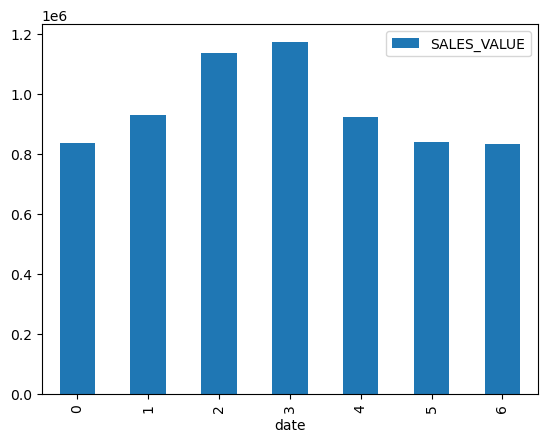

In [122]:
# Group transactions by dayofweek, then calculate sum and plot a bar chart
(transactions.groupby(transactions['date'].dt.dayofweek).agg({'SALES_VALUE': 'sum'}).plot.bar())

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc.


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [144]:
demographics = pd.read_csv('hh_demographic.csv', usecols=dem_col,dtype=dem_conv)

In [143]:
# Specify columns to include 
dem_col =['AGE_DESC','INCOME_DESC','household_key','HH_COMP_DESC']

In [142]:
# Convert the object columns here to category dtype
dem_conv = {'AGE_DESC': 'category', 'INCOME_DESC': 'category', 'HH_COMP_DESC': 'category' }

In [145]:
demographics

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16
...,...,...,...,...
796,35-44,50-74K,2 Adults No Kids,2494
797,45-54,75-99K,Unknown,2496
798,45-54,35-49K,Single Male,2497
799,25-34,50-74K,2 Adults No Kids,2498


In [146]:
demographics.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 10.9 KB


In [147]:
# Create total sales by household dataframe
house_holds = (transactions.groupby('household_key').agg({'SALES_VALUE': 'sum'}))

In [148]:
house_holds

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [149]:
# Join household sales and demographics table on household_key (inner since we're interested in both sets)
house_holds_merge = (house_holds.merge(demographics, how="inner", left_on='household_key',right_on='household_key'))


In [150]:
house_holds_merge

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.16,65+,35-49K,2 Adults No Kids
1,7,3400.05,45-54,50-74K,2 Adults No Kids
2,8,5534.97,25-34,25-34K,2 Adults Kids
3,13,13190.92,25-34,75-99K,2 Adults Kids
4,16,1512.02,45-54,50-74K,Single Female
...,...,...,...,...,...
663,2087,7832.74,45-54,100-124K,Unknown
664,2088,4905.71,25-34,35-49K,Single Female
665,2092,2290.54,35-44,Under 15K,1 Adult Kids
666,2094,3055.52,45-54,50-74K,2 Adults No Kids


In [151]:
house_holds_merge.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int64   
 1   SALES_VALUE    668 non-null    float64 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float64(1), int64(1)
memory usage: 19.8 KB


<AxesSubplot:xlabel='AGE_DESC'>

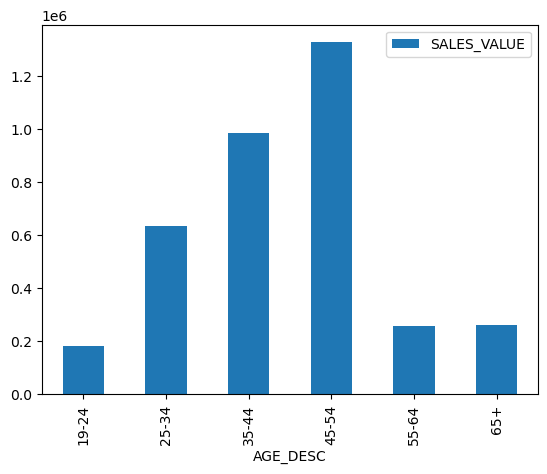

In [152]:
# Calculate sum of sales by age group
(house_holds_merge.groupby(['AGE_DESC']).agg({'SALES_VALUE': 'sum'}).plot.bar())

<AxesSubplot:xlabel='INCOME_DESC'>

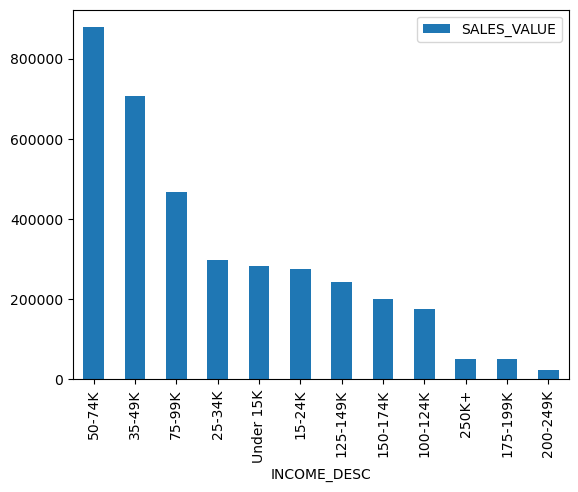

In [154]:
# Calculate sum of sales by income, ordered by magnitude
(house_holds_merge.groupby(['INCOME_DESC']).agg({'SALES_VALUE': 'sum'}).sort_values('SALES_VALUE',ascending=False).plot.bar())

In [156]:
# Calculate mean household spend by Age Description and HH Composition
# Format with a heatmap across all cells
(house_holds_merge.pivot_table(index='AGE_DESC', columns='HH_COMP_DESC',values='SALES_VALUE',aggfunc='mean',margins=True)
 .style.background_gradient(cmap='RdGy',axis=None))

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [157]:
products

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [159]:
# specify columns to use
products_col = ['PRODUCT_ID', 'DEPARTMENT']
# Convert the object columns here to category dtype
products_dtypes = {'PRODUCT_ID':'int32', 'DEPARTMENT':'category'}


In [160]:
products = pd.read_csv('product.csv',
                       usecols=products_col,
                       dtype=products_dtypes)

In [161]:
products

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY
...,...,...
92348,18293142,DRUG GM
92349,18293439,DRUG GM
92350,18293696,DRUG GM
92351,18294080,DRUG GM


In [162]:
products.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PRODUCT_ID  92353 non-null  int32   
 1   DEPARTMENT  92353 non-null  category
dtypes: category(1), int32(1)
memory usage: 455.0 KB


In [163]:
transactions

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,COUPON_MATCH_DISC,total_discount,percentage_discount,date
0,1364,26984896261,842930,1,2.19,31742,1,0.0,0.00,0.000000,2023-01-01
1,1364,26984896261,897044,1,2.99,31742,1,0.0,-0.40,0.133779,2023-01-01
2,1364,26984896261,920955,1,3.09,31742,1,0.0,0.00,0.000000,2023-01-01
3,1364,26984896261,937406,1,2.50,31742,1,0.0,-0.99,0.396000,2023-01-01
4,1364,26984896261,981760,1,0.60,31742,1,0.0,-0.79,1.000000,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,92130,1,0.99,3228,102,0.0,0.00,0.000000,2024-12-11
2146307,1598,42305362535,114102,1,8.89,3228,102,0.0,0.00,0.000000,2024-12-11
2146308,1598,42305362535,133449,1,6.99,3228,102,0.0,0.00,0.000000,2024-12-11
2146309,1598,42305362535,6923644,1,4.50,3228,102,0.0,-0.49,0.108889,2024-12-11


In [165]:
# Join all three tables together with an inner join
# Join product on product_id (only shared column)
transactions_merge_dept = (transactions
                           .merge(demographics, how='inner', left_on='household_key',right_on='household_key')
                           .merge(products, how='inner', left_on='PRODUCT_ID',right_on='PRODUCT_ID'))

In [166]:
transactions_merge_dept

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,COUPON_MATCH_DISC,total_discount,percentage_discount,date,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,31742,1,0.0,0.00,0.000000,2023-01-01,65+,100-124K,Single Female,GROCERY
1,304,27950201718,842930,1,1.67,333,12,0.0,-0.52,0.311377,2023-03-22,25-34,50-74K,2 Adults No Kids,GROCERY
2,575,34186568032,842930,1,1.67,433,70,0.0,-0.62,0.371257,2024-04-29,35-44,50-74K,Single Female,GROCERY
3,77,28023861855,842930,3,5.00,346,13,0.0,-1.57,0.314000,2023-03-28,35-44,100-124K,2 Adults Kids,GROCERY
4,454,42136182098,842930,1,1.67,391,101,0.0,-0.62,0.371257,2024-11-29,55-64,35-49K,Single Male,GROCERY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161570,540,41413346731,913709,1,10.99,299,93,0.0,0.00,0.000000,2024-10-06,25-34,50-74K,Single Female,DRUG GM
1161571,540,41587471481,1024615,1,11.99,299,95,0.0,0.00,0.000000,2024-10-19,25-34,50-74K,Single Female,DRUG GM
1161572,540,41587471481,9831733,1,0.00,299,95,0.0,-10.49,1.000000,2024-10-19,25-34,50-74K,Single Female,DRUG GM
1161573,540,41834711355,830676,1,8.99,299,97,0.0,-2.00,0.222469,2024-11-07,25-34,50-74K,Single Female,NUTRITION


In [172]:
# Where does our youngest demographic rank near the top in sales?
(transactions_merge_dept.pivot_table(index='DEPARTMENT', columns='AGE_DESC',values='SALES_VALUE',aggfunc='sum')
 .style.background_gradient(cmap='RdGy',axis=1))

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000


EXPORT
Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [173]:
(transactions_merge_dept.pivot_table(index='DEPARTMENT', columns='AGE_DESC',values='SALES_VALUE',aggfunc='sum')
 .style.background_gradient(cmap='RdGy',axis=1).to_excel('demographic_category_sales.xlsx',sheet_name='sales_pivot'))